### Multiple Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
df = pd.read_csv("../content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
le = LabelEncoder()
df["sex"] = le.fit_transform(df["sex"])
df["smoker"] = le.fit_transform(df["smoker"])
df["region"] = le.fit_transform(df["region"])

In [ ]:
X = df.iloc[:, :-1]
y = df['charges']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

<Axes: xlabel='age', ylabel='charges'>

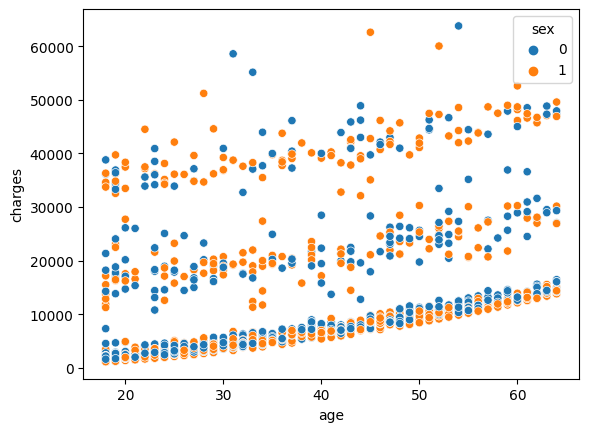

In [ ]:
# how much insurance is charged according to ages for both genders
sns.scatterplot(x='age', y='charges', hue="sex", data=df)

In [ ]:
# Model Training
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Predictions
test_predictions = model.predict(X_test)

# Calculating Errors
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

print(MAE)
print(MSE)
print(RMSE)

4186.508898366433
33635210.431178406
5799.587091438356


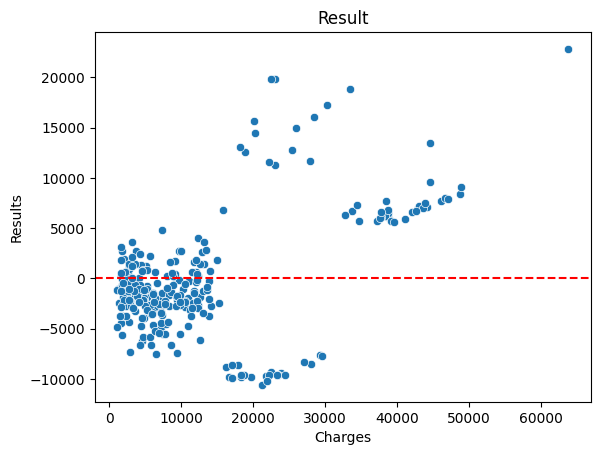

In [ ]:
result = y_test - test_predictions
sns.scatterplot(x = y_test, y = result)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Charges")
plt.ylabel("Results")
plt.title("Result")
plt.show()